# Создание дашборда

## Содержание:

- 1 Импортируем все нужные библиотеки
- 2 Создаем коннекцию к базе
- 3 Код для выгрузки данных
- 4 В Tableau Public на основе файла dash_visits.csv формируем дашборд в соответствии с макетом
- 5 Ответим на вопросы менеджеров, используя дашборд
- 6 Презентацию с отчётом

<b>Цель исследования</b> - Для Дениса и Валерии нужно сделать дашборд.
Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу.

<b>Исходные данные</b> - данные Яндекс Дзена.

**Описание данных**

Файл dash_visits.csv
- record_id — первичный ключ,
- item_topic — тема карточки,
- source_topic — тема источника,
- age_segment — возрастной сегмент,
- dt — дата и время,
- visits — количество событий.

### Техническое задание

Пообщавшись с менеджерами и администраторами баз данных, вы написали краткое ТЗ:

- Бизнес-задача: 
  - Анализ взаимодействия пользователей с карточками Дзена;
  - Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
  - Кто будет основным пользователем дашборда: менеджеры по анализу контента;

- Состав данных для дашборда:
  - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
  - Разбивка событий по темам источников;
  - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
  - Дата и время;
  - Тема карточки;
  - Тема источника;
  - Возрастная группа;
- Характер данных:
  - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
  - Разбивка событий по темам источников — относительные величины (% событий);
  - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики иТаблица хранится в специально подготовленной для вас базе данных zen;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

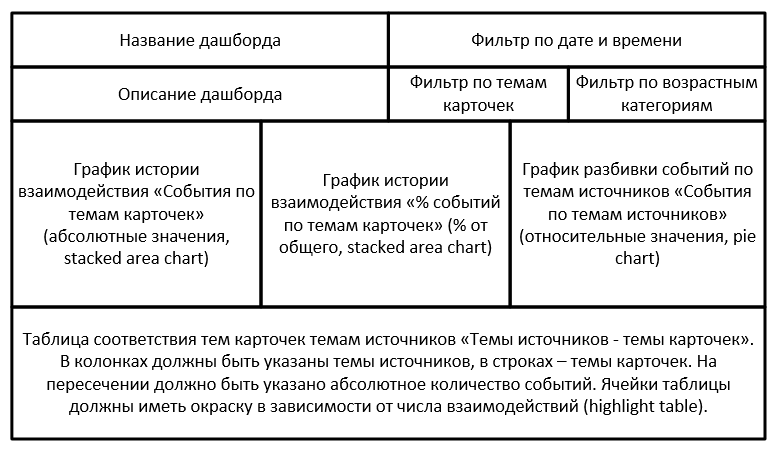

###  1 Импортируем все нужные библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sqlalchemy import create_engine

### 2 Создаем коннекцию к базе

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 


query = ''' SELECT *
            FROM dash_visits
        '''

data_raw = pd.io.sql.read_sql(query, con = engine) 

print(data_raw.head(5))

   record_id item_topic source_topic age_segment                  dt  visits
0    1040597     Деньги         Авто       18-25 2019-09-24 18:32:00       3
1    1040598     Деньги         Авто       18-25 2019-09-24 18:35:00       1
2    1040599     Деньги         Авто       18-25 2019-09-24 18:54:00       4
3    1040600     Деньги         Авто       18-25 2019-09-24 18:55:00      17
4    1040601     Деньги         Авто       18-25 2019-09-24 18:56:00      27


### 3 Код для выгрузки данных

In [3]:
data_raw.to_csv(r"C:\Users\Кирилл\aut\dash_visits.csv")

### 4 В Tableau Public на основе файла dash_visits.csv формируем дашборд в соответствии с макетом

https://public.tableau.com/app/profile/bao.tao/viz/Book2_16877065417600/Dashboard1?publish=yes

### 5 Ответим на вопросы менеджеров, используя дашборд

- 1.Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- 2.Как много карточек генерируют источники с разными темами?
- 3.Как соотносятся темы карточек и темы источников?

1.Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?

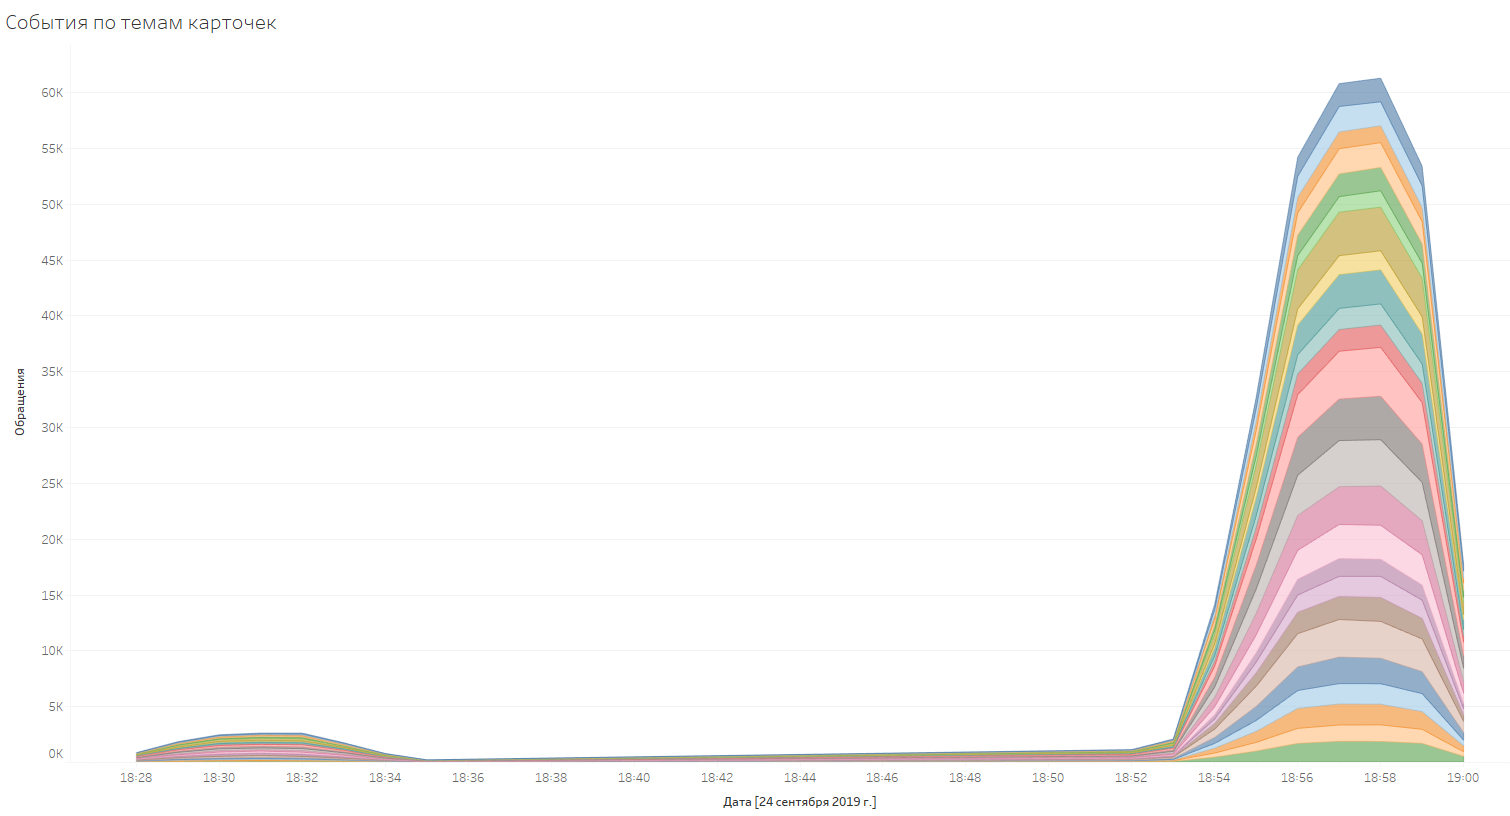

2.Как много карточек генерируют источники с разными темами?

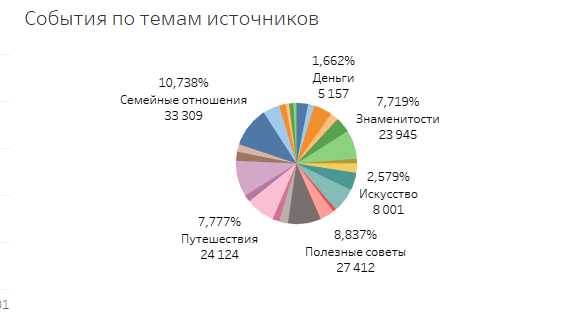

3.Как соотносятся темы карточек и темы источников?

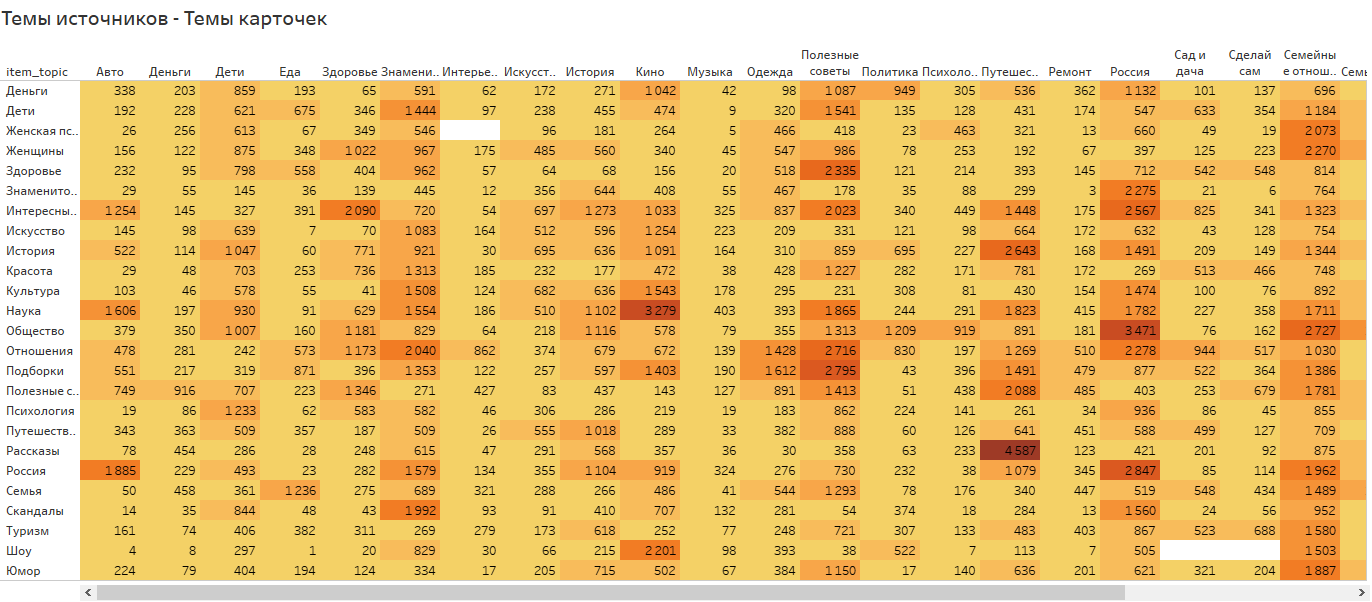

### 6 Презентацию с отчётом

https://disk.yandex.ru/i/R4KMXdiNlrI3wQ